In [451]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

import sys
sys.path.append("../")
import importlib
import mqe
importlib.reload(mqe)
importlib.reload(mqe.plot)

<module 'mqe.plot' from '../mqe/plot.py'>

## Load data

In [2]:
trial_name = 'trial_final_test'
model_name = 'lightgbm'

In [3]:
path = '../result/gefcom2014-wind/'+trial_name+'/dfs_y_pred_train/*'+model_name+'*.csv'
dfs_y_pred_train = mqe.forecast.load_dfs_trial(path)
path = '../result/gefcom2014-wind/'+trial_name+'/dfs_y_train/*'+'*.csv'
dfs_y_train = mqe.forecast.load_dfs_trial(path)

path = '../result/gefcom2014-wind/'+trial_name+'/dfs_y_pred_valid/*'+model_name+'*.csv'
dfs_y_pred_valid = mqe.forecast.load_dfs_trial(path)
path = '../result/gefcom2014-wind/'+trial_name+'/dfs_y_valid/*'+'*.csv'
dfs_y_valid = mqe.forecast.load_dfs_trial(path)

## Plot forecast

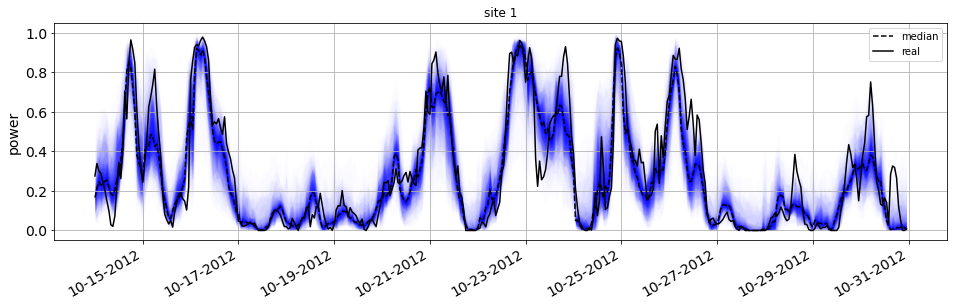

In [4]:
start_time = '2012-10-14'
end_time = '2012-10-30'
mqe.plot.plot_quantile_forecast(dfs_y_pred_valid[0][['1']], dfs_y_valid[0][['1']], start_time, end_time);

## Plot MAE

<AxesSubplot:xlabel='lead_time', ylabel='mse'>

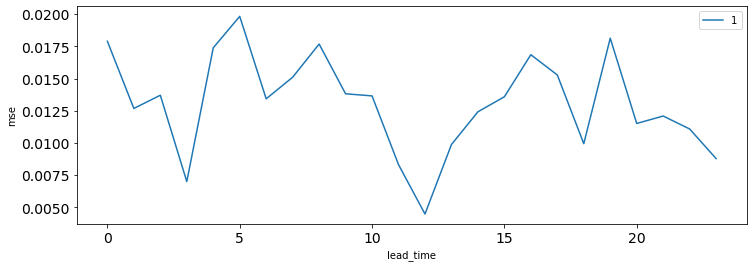

In [455]:
mqe.plot.plot_mae_mse_lead_time(dfs_y_pred_valid[0][['1']], dfs_y_valid[0][['1']], pred_column='quantile50', kind='mse')

## Plot SKILL

In [456]:
df_y_train = dfs_y_train[0][['1']]
autocorr = [df_y_train.squeeze().autocorr(lag=lag) for lag in range(24)]
climatology = df_y_train.mean()[0]

<AxesSubplot:xlabel='lead_time [h]', ylabel='skill [%]'>

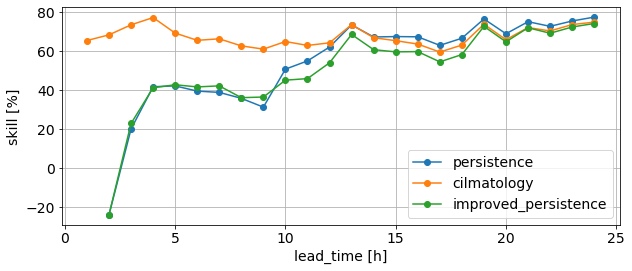

In [457]:
mqe.plot.plot_skill_mae_mse_lead_time(dfs_y_pred_valid[0][['1']], dfs_y_valid[0][['1']], climatology, autocorr, pred_column='quantile50', kind='mae')

## Plot absolute error over year

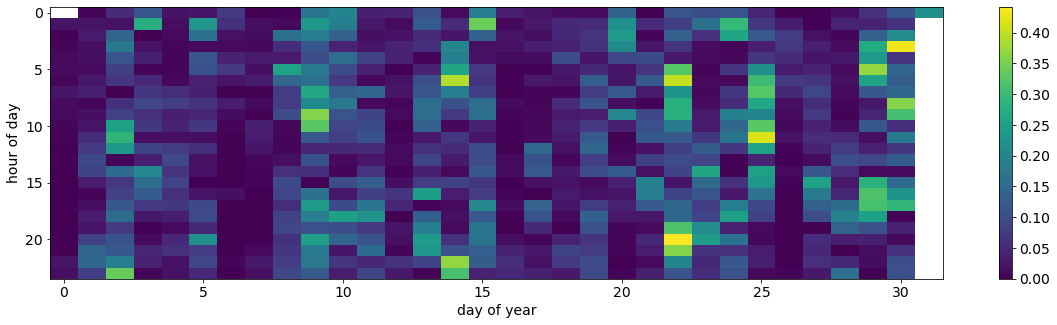

In [61]:
mqe.plot.plot_mae_mse_timeofyear(dfs_y_pred_valid[0][['1']], dfs_y_valid[0][['1']], pred_column='quantile50', kind='mae')

## Scatter plot

In [62]:
df_y_pred_train = dfs_y_pred_train[0].filter(regex='quantile50').droplevel(1, axis=1)
df_y_train = dfs_y_train[0].droplevel(1, axis=1)
df_y_pred_valid = dfs_y_pred_valid[0].filter(regex='quantile50').droplevel(1, axis=1)
df_y_valid = dfs_y_valid[0].droplevel(1, axis=1)

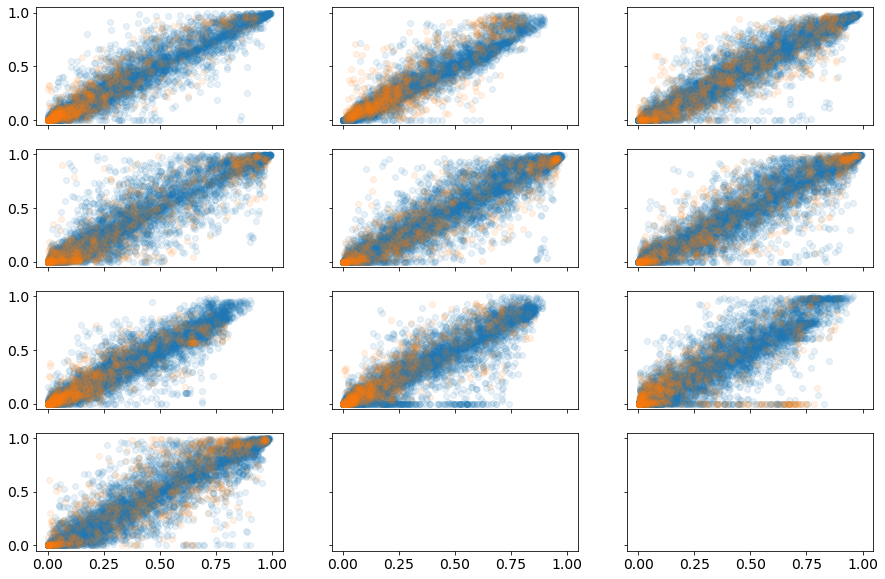

In [63]:
mqe.plot.plot_scatters(df_y_pred_train, df_y_train, df_y_pred_valid=df_y_pred_valid, df_y_valid=df_y_valid)

## Plot distributions

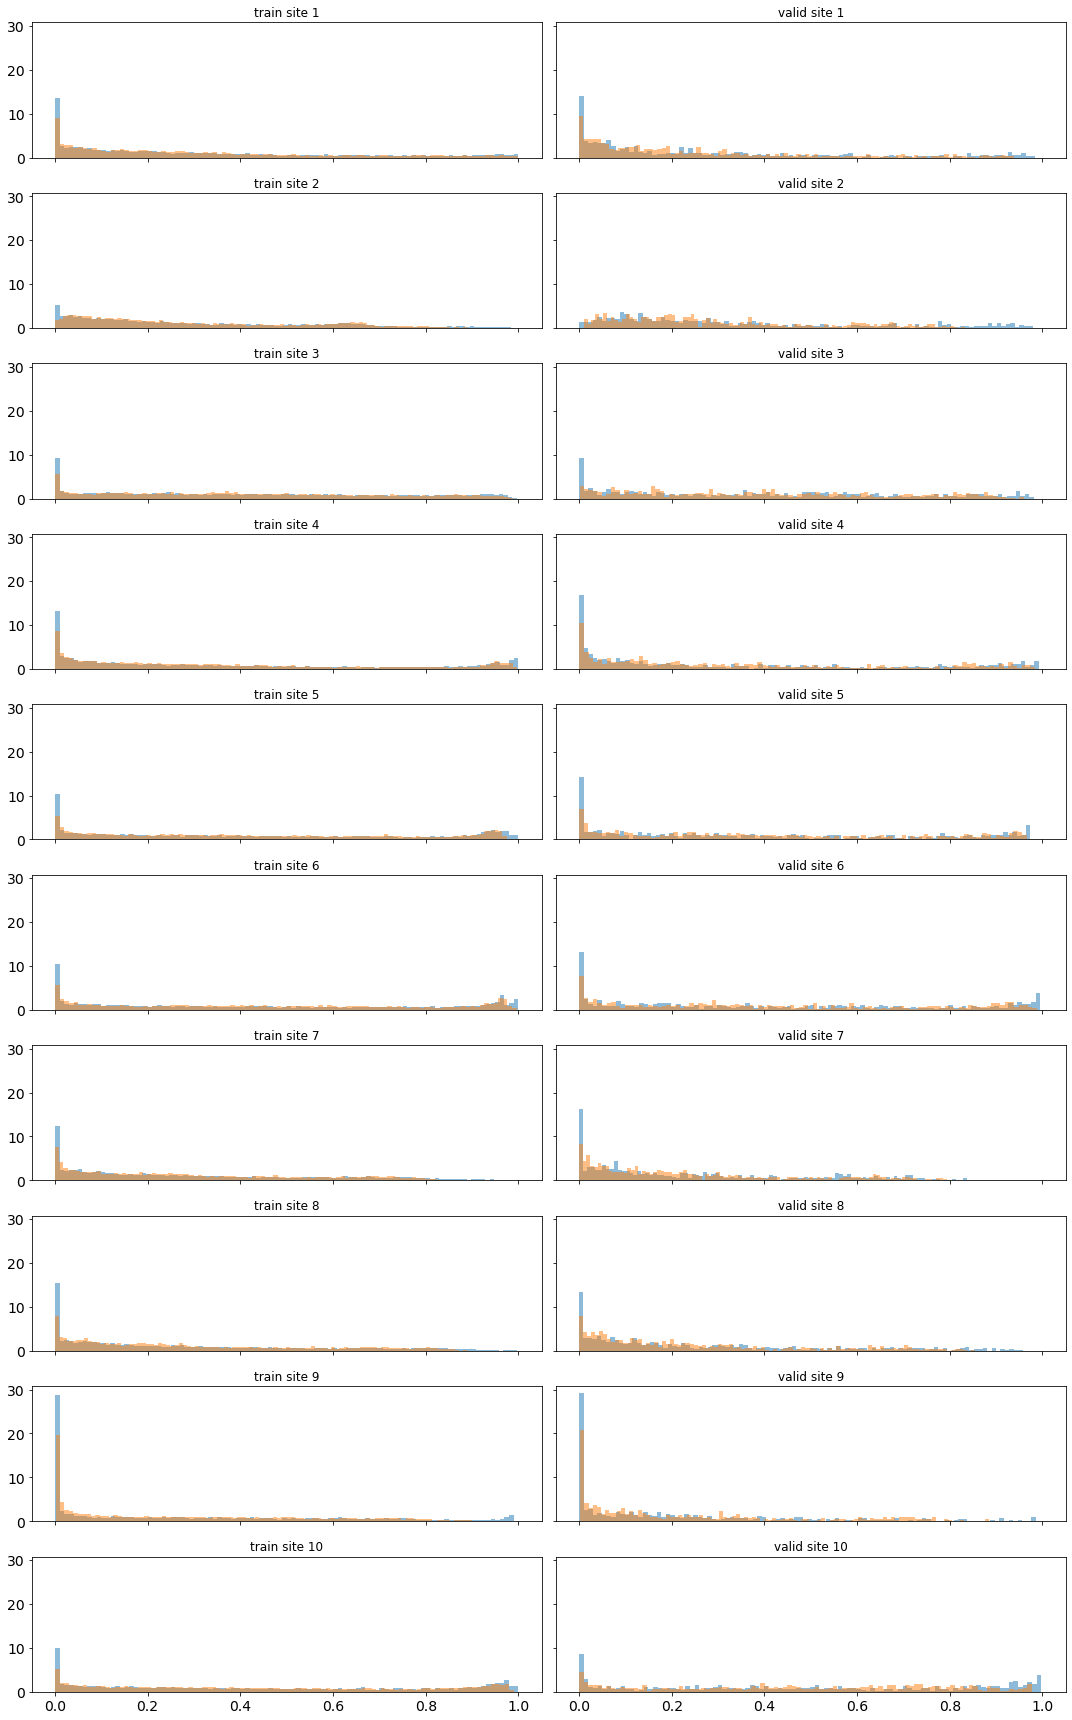

In [64]:
mqe.plot.plot_distributions(df_y_pred_train, df_y_train, df_y_pred_valid=df_y_pred_valid, df_y_valid=df_y_valid)